In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import os
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_dir = 'D:/zzStudies/CSE499/Bangla Dataset v0.1/'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

##image_size = 32*32

['test', 'train']
['ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ', 'ড়', 'ঢ়', 'য়']


In [3]:
transform = tt.Compose(
    [
        #tt.CenterCrop(1200),
        tt.Resize(64),
        tt.ToTensor(),
        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
dataset = ImageFolder(data_dir+"/train", transform)

In [4]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 76, 64]) 0


tensor([[[ 0.0431,  0.0588,  0.0667,  ..., -0.3725, -0.3961, -0.4118],
         [ 0.0510,  0.0745,  0.1137,  ..., -0.3569, -0.3804, -0.3961],
         [ 0.0824,  0.0980,  0.1294,  ..., -0.3412, -0.3569, -0.3725],
         ...,
         [ 0.5765,  0.5843,  0.5922,  ...,  0.0039, -0.0039, -0.0118],
         [ 0.4824,  0.5529,  0.5922,  ..., -0.0039, -0.0196, -0.0196],
         [ 0.2314,  0.3725,  0.4980,  ..., -0.0039, -0.0196, -0.0275]],

        [[ 0.0510,  0.0588,  0.0510,  ..., -0.3647, -0.3725, -0.3804],
         [ 0.0510,  0.0667,  0.0902,  ..., -0.3490, -0.3647, -0.3804],
         [ 0.0745,  0.0824,  0.1059,  ..., -0.3333, -0.3490, -0.3569],
         ...,
         [ 0.5608,  0.5843,  0.5922,  ...,  0.0039, -0.0039, -0.0118],
         [ 0.4667,  0.5451,  0.5922,  ..., -0.0039, -0.0196, -0.0196],
         [ 0.2157,  0.3569,  0.4980,  ..., -0.0039, -0.0196, -0.0275]],

        [[ 0.0039,  0.0196,  0.0196,  ..., -0.3490, -0.3647, -0.3725],
         [ 0.0118,  0.0196,  0.0431,  ..., -0

In [5]:
print(dataset.classes)

['ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ', 'ড়', 'ঢ়', 'য়']


In [6]:
random_seed = 8
torch.manual_seed(random_seed);
print(len(dataset))

5299


In [7]:
val_size = 100
test_size = 1000
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

print(len(train_ds), len(val_ds), len(test_ds))

4199 100 1000


In [8]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow((img.permute(1, 2, 0)))

Label:  ঁ (0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


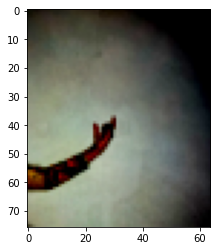

In [9]:
show_example(*dataset[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  ঁ (0)


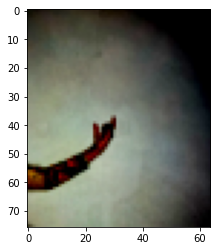

In [10]:
show_example(*dataset[0])

In [11]:
def get_default_device():
    # Pick GPU if available, else CPU 
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    # Move tensor(s) to chosen device 
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    # Wrap a dataloader to move data to a device 
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
     #   Yield a batch of data after moving it to device
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
     #   Number of batches
        return len(self.dl)

In [12]:
device = get_default_device()
device

device(type='cuda')

In [13]:
batch_size=64

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, shuffle=True, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

In [14]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [15]:
show_batch(train_dl)

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 202, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 83, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 83, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 64, 85] at entry 0 and [3, 64, 64] at entry 6


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
class ASLModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 32 x 32
            
            nn.Conv2d(128, 256, kernel_size=2, stride=2, padding=0),
            nn.ReLU(),
            nn.Dropout(0.25),  # output: 128 x 16 x 16
            
            nn.Conv2d(256, 128, kernel_size=1, stride=1, padding=0),
            nn.ReLU(),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 8 x 8
            
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 1024 x 4 x 4
            
            nn.Flatten(), 
            nn.Linear(1024*4*4, 1024), # (1024*4*4)
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 59))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = ASLModel()
to_device(model, device);
model

In [ ]:
"""
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break
"""

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ASLModel(), device)

In [ ]:
evaluate(model, val_dl)

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model, test_dl)

In [ ]:
torch.save(model.state_dict(), 'BSL CNN 2.pth')

In [ ]:
#torch.save(model.state_dict(), 'BSL CNN 2.h5')